<a href="https://colab.research.google.com/github/Deepika1454/Audio-Classification-with-Pre-trained-Model/blob/main/Sentiment_Analysis_based_on_movie_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install textblob
!pip install nltk


In [2]:
from textblob import TextBlob
import nltk
nltk.download('movie_reviews')


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

# Get all movie reviews

# Shuffle the dataset for randomness

# Display a sample review

In [3]:
from nltk.corpus import movie_reviews
import random
reviews = [(movie_reviews.words(fileid), category)
           for category in movie_reviews.categories()
           for fileid in movie_reviews.fileids(category)]

random.shuffle(reviews)

print(reviews[0])


(['note', ':', 'some', 'may', 'consider', 'portions', ...], 'neg')


Define a Function for Sentiment Analysis

In [4]:

def get_sentiment(text):

    blob = TextBlob(' '.join(text))

    return blob.sentiment.polarity


review_text = reviews[0][0]
print("Sentiment Score: ", get_sentiment(review_text))


Sentiment Score:  0.07877382068103718


Evaluate Sentiment on Multiple Reviews

In [5]:

sentiment_results = []
for review in reviews[:10]:
    text, category = review
    sentiment_score = get_sentiment(text)
    sentiment_category = 'Positive' if sentiment_score > 0 else 'Negative'
    sentiment_results.append((sentiment_category, sentiment_score, ' '.join(text)))
for result in sentiment_results:
    print(f"Review Sentiment: {result[0]}, Sentiment Score: {result[1]}")


Review Sentiment: Positive, Sentiment Score: 0.07877382068103718
Review Sentiment: Positive, Sentiment Score: 0.1035702479338843
Review Sentiment: Positive, Sentiment Score: 0.11862541672886502
Review Sentiment: Positive, Sentiment Score: 0.04002992891881781
Review Sentiment: Negative, Sentiment Score: -0.01981707317073171
Review Sentiment: Positive, Sentiment Score: 0.16432323232323232
Review Sentiment: Positive, Sentiment Score: 0.12591647770219203
Review Sentiment: Positive, Sentiment Score: 0.16565040650406504
Review Sentiment: Positive, Sentiment Score: 0.13434210526315785
Review Sentiment: Positive, Sentiment Score: 0.3636675020885547


Conclusion and Insights

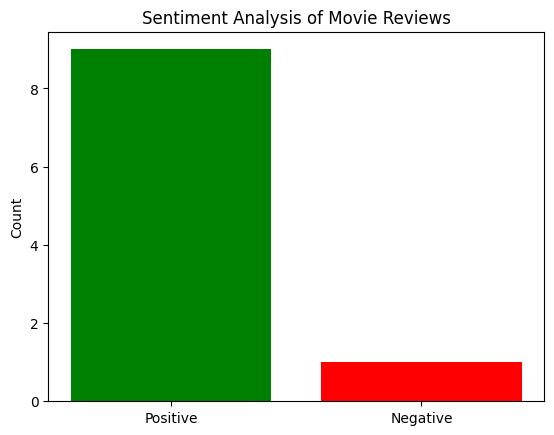

In [6]:
import matplotlib.pyplot as plt


positive = len([result for result in sentiment_results if result[0] == 'Positive'])
negative = len([result for result in sentiment_results if result[0] == 'Negative'])

plt.bar(['Positive', 'Negative'], [positive, negative], color=['green', 'red'])
plt.title('Sentiment Analysis of Movie Reviews')
plt.ylabel('Count')
plt.show()


In [7]:

def test_sentiment(input_review):
    review_words = input_review.split()
    sentiment_score = get_sentiment(review_words)
    sentiment_category = 'Positive' if sentiment_score > 0 else 'Negative'
    return sentiment_category, sentiment_score


custom_review = input("Enter a movie review: ")
sentiment, score = test_sentiment(custom_review)
print(f"Sentiment: {sentiment}, Score: {score}")


Enter a movie review: The movie was okay, neither great nor bad. It was an average experience
Sentiment: Positive, Score: 0.11250000000000004
